<a href="https://colab.research.google.com/github/Ayushitiwari01/driving-profits-taxi-fare-insights/blob/main/Max_Revenue_for_Taxi_cab_drivers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🚖 Driving Profits: A Data-Driven Study on Taxi Payment Methods and Fare Revenue**

##  Problem Statement
In the fast-paced taxi booking sector, making the most of revenue is essential from long-time success and driver happiness.

Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount..

##  Objective
This Project main goal is run an Hypothesis test to examine the relationship between the total fare and the method of payment. We use Python Hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

##  Research Question
is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customers experience?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/Taxi_Trip_Data.csv")
df = data.copy()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


## Exploratory Data Analysis

In [ ]:
df.shape

(141085, 18)

In [ ]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,140839.000000,140838.000000,141084.000000,140838.000000,141084.000000,141084.000000,140838.000000,141084.000000,141084.000000,141084.000000,141084.000000,141084.000000,141084.000000,141084.000000,141084.000000
mean,1.700843,1.666986,3.407331,1.091815,157.260717,154.750305,1.369460,13.718262,0.919762,0.490411,2.082072,0.397803,0.297457,19.468140,2.219080
std,0.457890,1.222757,4.151309,1.080347,69.050218,73.457530,0.519284,13.392886,1.150115,0.081109,3.288538,1.830220,0.038236,16.133562,0.813785
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-207.000000,-4.500000,-0.500000,-0.860000,-12.500000,-0.300000,-207.300000,-2.500000
25%,1.000000,1.000000,1.090000,1.000000,107.000000,90.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,10.800000,2.500000
50%,2.000000,1.000000,1.900000,1.000000,158.000000,158.000000,1.000000,9.500000,0.500000,0.500000,1.660000,0.000000,0.300000,14.300000,2.500000
75%,2.000000,2.000000,3.830000,1.000000,231.000000,231.000000,2.000000,15.500000,2.500000,0.500000,2.860000,0.000000,0.300000,21.360000,2.500000
max,2.000000,9.000000,100.150000,99.000000,265.000000,265.000000,4.000000,400.000000,4.500000,1.100000,450.000000,126.120000,0.300000,465.300000,2.750000


## Features impacting Fare Amount:
->  Trip distance

->  Trip Duration

->  Pickup and Drop Location

In [ ]:
df.dtypes

,0
VendorID,float64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,float64
DOLocationID,float64
payment_type,float64


In [ ]:
# HOW TO FIND DURATION
# object to date-time datatype
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [ ]:
# DURATION
df['Duration']=df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['Duration']=df['Duration'].dt.total_seconds()/60
# this means 6.99 -> 6 minutes and 99 seconds
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141080,2.0,2020-01-01 19:38:59,2020-01-01 19:48:36,1.0,1.08,1.0,N,162.0,161.0,2.0,8.0,0.0,0.5,0.00,0.0,0.3,11.30,2.5,9.616667
141081,1.0,2020-01-01 19:34:45,2020-01-01 19:58:05,2.0,14.20,1.0,N,132.0,223.0,1.0,38.5,1.0,0.5,8.05,0.0,0.3,48.35,0.0,23.333333
141082,1.0,2020-01-01 19:07:56,2020-01-01 19:22:23,1.0,3.60,1.0,N,143.0,113.0,2.0,13.0,2.5,0.5,0.00,0.0,0.3,16.30,2.5,14.450000
141083,1.0,2020-01-01 19:30:33,2020-01-01 19:38:26,2.0,2.50,1.0,N,68.0,163.0,2.0,9.0,2.5,0.5,0.00,0.0,0.3,12.30,2.5,7.883333


In [ ]:
# Removing unwanted columns
df=df[['passenger_count','payment_type','fare_amount','trip_distance','Duration']]
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
141080,1.0,2.0,8.0,1.08,9.616667
141081,2.0,1.0,38.5,14.20,23.333333
141082,1.0,2.0,13.0,3.60,14.450000
141083,2.0,2.0,9.0,2.50,7.883333


In [ ]:
df.isnull().sum()

,0
passenger_count,247
payment_type,247
fare_amount,1
trip_distance,1
Duration,1


# if null values are present how to deal
# percentage less ->DROP
# percentage more ->FILL

In [ ]:
print('Percentage of Missing Values in the Dataset is ',(65441/len(df))*100)


Percentage of Missing Values in the Dataset is  46.3840946946876


In [ ]:
df.dropna(inplace = True)
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
141079,1.0,1.0,9.5,2.71,8.566667
141080,1.0,2.0,8.0,1.08,9.616667
141081,2.0,1.0,38.5,14.20,23.333333
141082,1.0,2.0,13.0,3.60,14.450000


In [ ]:
# float to int
df['passenger_count'] =df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
141079,1,1,9.5,2.71,8.566667
141080,1,2,8.0,1.08,9.616667
141081,2,1,38.5,14.20,23.333333
141082,1,2,13.0,3.60,14.450000


In [ ]:
# check dupe values
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,Duration
2064,1,2,7.0,0.0,0.000000
2451,1,1,52.0,0.0,0.200000
2456,2,1,9.5,1.7,13.066667
2476,1,1,4.0,0.4,3.083333
3358,1,1,6.0,1.2,5.350000
...,...,...,...,...,...
141030,1,1,6.5,1.4,5.883333
141038,1,1,8.0,1.8,7.000000
141039,1,1,12.0,3.0,12.933333
141061,1,1,6.0,1.0,5.966667


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(131342, 5)

In [ ]:
# range of passenger_count->caegorical data(ENCODED)
# we need to find the DISTRIBUTION of data->both for categorical and numerical
#it shows the percentage of passengers for each segment
df['passenger_count'].value_counts(normalize=True)

,proportion
passenger_count,
1,0.618995
2,0.201078
3,0.060544
5,0.042058
4,0.037056
6,0.023724
0,0.016491
8,0.000038
7,0.000008


In [ ]:
df['payment_type'].value_counts(normalize=True)

,proportion
payment_type,
1,0.636978
2,0.352134
3,0.006639
4,0.004248


In [ ]:
# Removing outliers
df=df[df['payment_type']<3]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)] # means 1-5

print(df['payment_type'].value_counts(normalize=True))
print(df['passenger_count'].value_counts(normalize=True))

payment_type
1    0.64374
2    0.35626
Name: proportion, dtype: float64
passenger_count
1    0.644421
2    0.209814
3    0.063215
5    0.044122
4    0.038428
Name: proportion, dtype: float64


In [ ]:
df.shape

(124701, 5)

In [ ]:
df['payment_type'].replace([1,2],['card','cash'],inplace=True)
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
4,1,cash,3.5,0.00,2.300000
...,...,...,...,...,...
141079,1,card,9.5,2.71,8.566667
141080,1,cash,8.0,1.08,9.616667
141081,2,card,38.5,14.20,23.333333
141082,1,cash,13.0,3.60,14.450000


In [ ]:
df.describe()

,passenger_count,fare_amount,trip_distance,Duration
count,124701.000000,124701.000000,124701.000000,124701.000000
mean,1.628014,14.264580,3.569828,17.836296
std,1.058337,13.468043,4.230794,82.070820
min,1.000000,-110.000000,0.000000,0.000000
25%,1.000000,6.500000,1.150000,6.383333
50%,1.000000,10.000000,2.050000,10.783333
75%,2.000000,16.500000,4.090000,17.416667
max,5.000000,400.000000,100.150000,1439.600000


In [ ]:
# to remove any -ve value in these fields
df=df[df['fare_amount']>0]
df=df[df['trip_distance']>0]
df=df[df['Duration']>0]

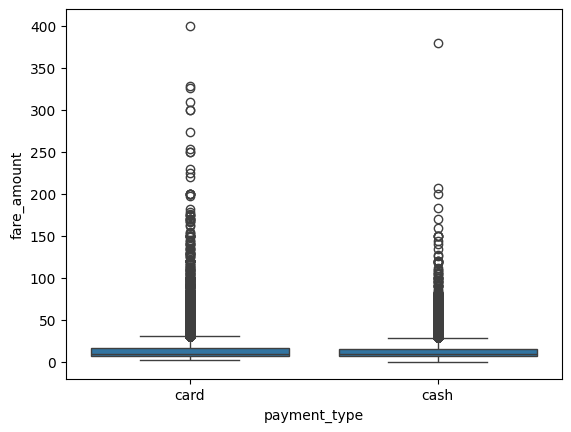

In [ ]:
# checking for outliers
sns.boxplot(data=df, y='fare_amount',x='payment_type')
plt.show()

In [ ]:
# using interquartile range ->to remove all outliers
for col in ['fare_amount', 'trip_distance', 'Duration']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
5,1,cash,2.5,0.03,0.883333
...,...,...,...,...,...
141076,1,card,13.0,3.40,13.933333
141079,1,card,9.5,2.71,8.566667
141080,1,cash,8.0,1.08,9.616667
141082,1,cash,13.0,3.60,14.450000


We're interested on exploring the relationship between payment type and passenger behavior concerning trip distance and fare amount. Are there variations in the distribution of payment types concerning different fare amounts or trip distances?

To Investigate this, we'll plot histograms to visualize the distributions of passenger counts paying with either card or cash. This will also provide stakeholders with insight into fare amount ranges associated with different payment methods.

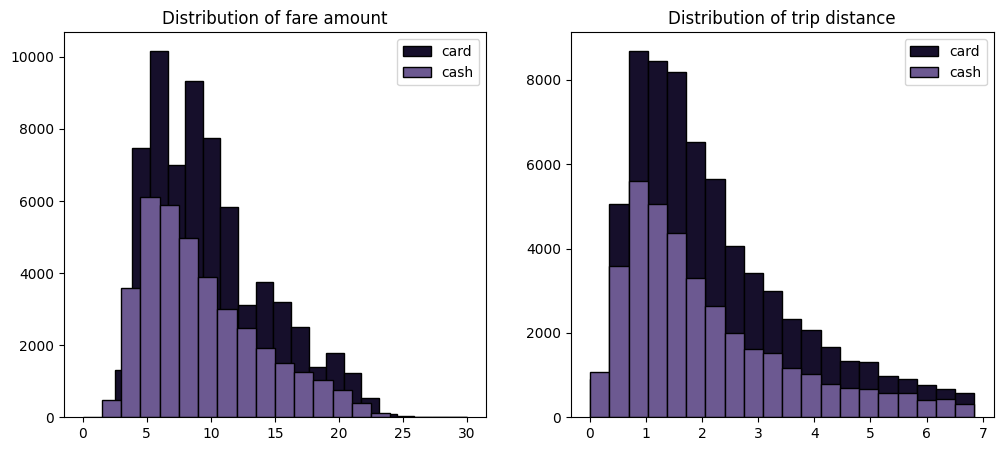

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='card']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#160f2b',label='card')
plt.hist(df[df['payment_type']=='cash']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#6c5991',label='cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type']=='card']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#160f2b',label='card')
plt.hist(df[df['payment_type']=='cash']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#6c5991',label='cash')
plt.legend()


plt.show()

In [ ]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})


fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
card            9.910792  4.506112      2.220095  1.460068
cash            9.604693  4.563361      2.101093  1.503445

New, in order to examine the passenger's preference regarding their choice of payment method, we will assess the proportion of the two payment types. To provide a visual representation, we have opted to utilize a pie chart, This graphical depication will offer a clear and intuitive understanding of the distribution b etween the two payment methods chosen by passengers.

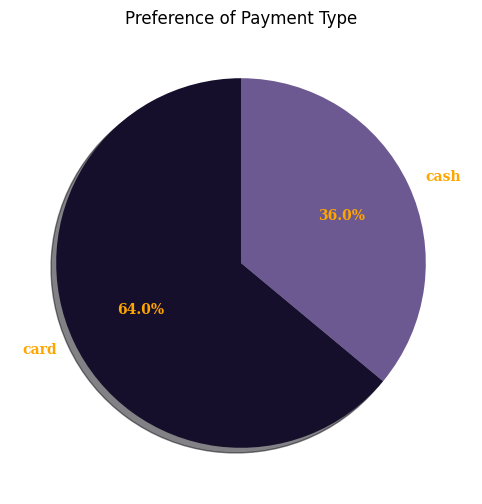

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True),labels=df['payment_type'].value_counts().index,
        startangle=90, shadow=True,autopct='%1.1f%%', colors=['#160f2b','#6c5991'],textprops={'color': 'orange','fontsize':10,'weight': 'bold','family': 'serif'})
plt.show()

subsequently, we aim to conduct an analysis of the payment types in relation to the passenger count. Our objective is to investigate if there are any changes in preference contingent upon the number of passengers traveling in the cab.

To facilitate this examination, we have employed a visualization technique known as a stacked bar plot. this method is particularly advantageous for comparing the precentage distribution of each passenger count based on the payment method selected. Through this graphical representation, we can gain insights into potential variations in payment preferences across different passenger counts

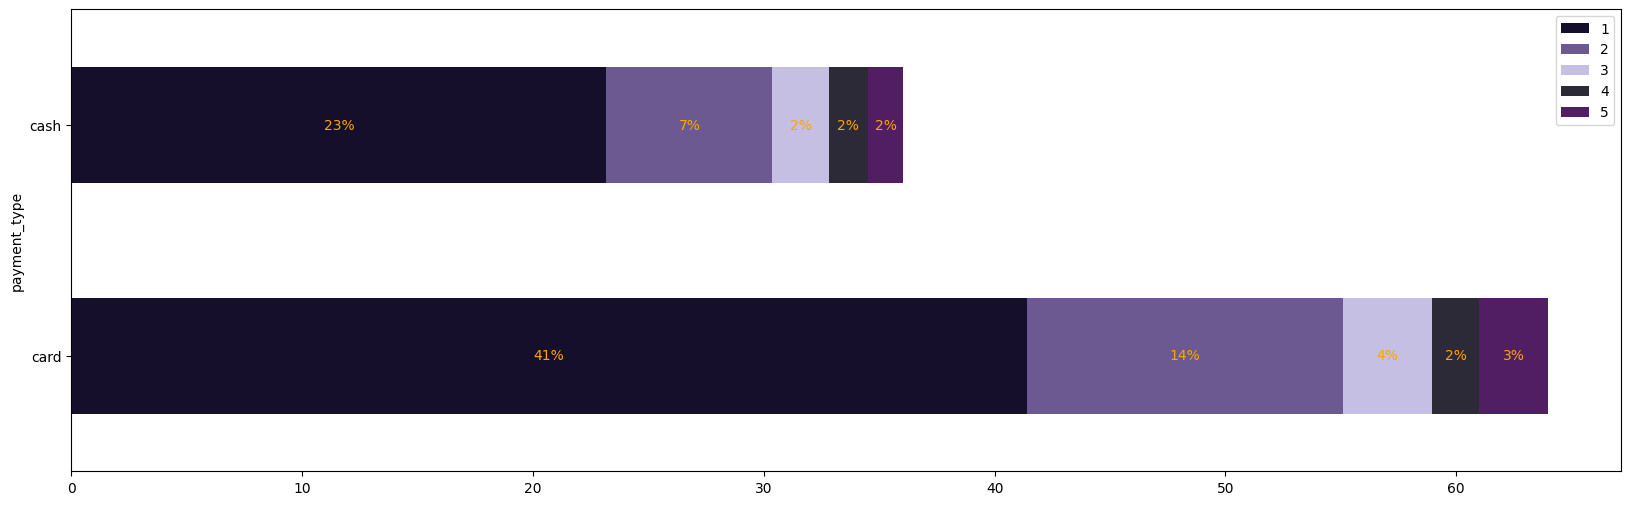

In [ ]:
## Calculating the total passenger count distribution based on the different payment type
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

##renaming the passenger_count to count to reset the index.
passenger_count.rename(columns={'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)


## calculating the precentage of the each passenger count
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100



## Creating a new empty dataframe to store the distribution of each payment type. (useful for the visualization)
data = pd.DataFrame(columns= ['payment_type',1,2,3,4,5])
data['payment_type']=['card','cash']
data.iloc[0,1:] = passenger_count.iloc[:5,-1]
data.iloc[1,1:] = passenger_count.iloc[5:,-1]



fig, ax = plt.subplots(figsize=(20, 6))
data.plot(kind='barh', x='payment_type', stacked=True, color=['#160f2b', '#6c5991', '#c4bfe3', '#2c2a36', '#521e63'], ax=ax)

# Adding percentage text on the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(
        x + width / 2,
        y + height / 2,
        '{:.0f}%'.format(width),
        horizontalalignment='center',
        verticalalignment='center',
        color='orange'
    )

plt.show()

## Hypothesis Testing
In order to select the most suitable test for our initial step involves evaluating whethere the distribution of fare amount adheres to a normal distribution. While the histogram depicted above suggests otherwise, we will further confirm this by generating a QQ plot.

Quantile-quantile(QQ) plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributed. if the data points closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution.

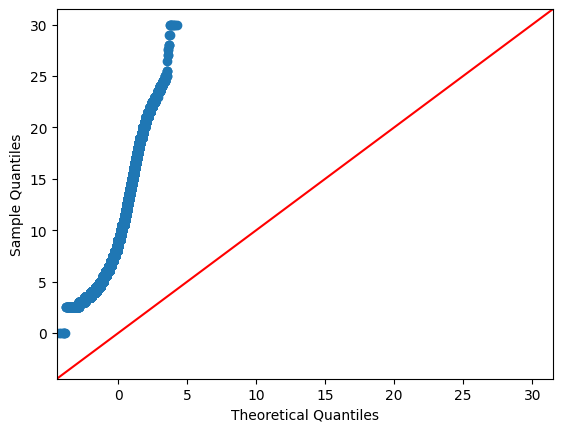

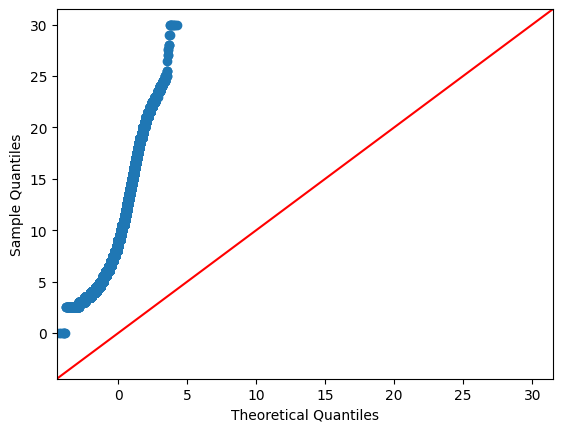

In [ ]:
import statsmodels.api as sm
sm.qqplot(df['fare_amount'],line='45')

The data values clearly do not follow the red 45 degree line, which is an indication that they do not follow a normal distribution. So Z distribution will not be good for this. That's why we will use T test.

Given that the T-Test can be applied to both small and large samples and does not require the population standard deviation, it is a more universally applicable approach for hypothesis testing in many practical research scenarios, including analysis of taxi trip data.

In the analysis of NYC Yellow Taxi Records, where you're likely dealing with an unknown population standard deviation and potentially large datasets. the T-Test offers a more appropriate and flexible method for comparing means between two groups (fare amounts by payment type). It provides a reliable way to infer about the population, accommodating the uncertainty that comes with estimating population parameters from sample data.

**Null Hypothesis**: There is no difference in average fare between customers who use 'Credit cards' and customers who use 'cash.'

**Alternative Hypothesis**: There is a difference in average fare between customers who use 'Credit cards' and customers who use 'cash.'


In [ ]:
## Sample 1
card_sample = df[df['payment_type']=='card']['fare_amount']

## Sample 2
cash_sample = df[df['payment_type']=='cash']['fare_amount']

In [ ]:
from scipy import stats

## Performing T-Test on both the different sample
t_stats, p_value = stats.ttest_ind(a=card_sample, b=cash_sample, equal_var=False)
print(f"T-Statistic: {t_stats:.4f}")
print(f"P-Value: {p_value:.4e}")

# Comparing the P value with the significance of 5% or 0.05.
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis (H₀). There is a significant difference in average fare between 'Credit card' and 'Cash' users.")
else:
    print("Conclusion: Fail to reject the null hypothesis (H₀). There is no significant difference in average fare between 'Credit card' and 'Cash' users.")

T-Statistic: 10.4345
P-Value: 1.7947e-25
Conclusion: Reject the null hypothesis (H₀). There is a significant difference in average fare between 'Credit card' and 'Cash' users.


We Reject the null hypothesis

Since the p-value is significantly smaller than the significance level of 5% we will reject the null hypothesis.

There is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

The Key busniess insight is the encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers

